In [1]:
import utils
import pandas as pd
import matplotlib.pyplot as plt

/Users/QDAI8/opt/miniconda3/envs/dl/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the pickle files
scaled_train = pd.read_pickle("scaled_train.pkl")
scaled_test = pd.read_pickle("scaled_test.pkl")

# Final model for gpath

In [3]:
# Generate sequences for train and test sets
feature_columns = scaled_train.drop(columns=['projid', 'study', 'fu_year', 'cogdx', 
                                             'amyloid', 'gpath', 'tangles', 'niareagansc']).columns.tolist()
target_columns = ['gpath', 'tangles', 'amyloid', 'niareagansc']

train_ids = scaled_train.projid.unique()
train_sequences = utils.create_sequences(scaled_train, train_ids, feature_columns, target_columns)

test_ids = scaled_test.projid.unique()
test_sequences = utils.create_sequences(scaled_test, test_ids, feature_columns, target_columns)

test_r2, train_loss, val_loss, lr_history = utils.train_and_evaluate_model(
    train_data=train_sequences,
    test_data=test_sequences,
    input_dim=len(feature_columns),
    output_dim=len(target_columns),  
    num_epochs=500,
    patience=10,
    lr_scheduler_patience=5,
    lr_factor=0.5,
    hidden_size=16,
    num_layers=3,
    batch_size=16,
    learning_rate=0.01,
    seed=1217,
    model_save_path="best_model_gpath.pth",
    dropout_rate=0
)

In [4]:
test_r2

[0.31672503041091715,
 0.40162617003188383,
 0.15239225615073287,
 0.33503245894620004]

- Using the best parameter for gpath, the LSTM test $R^2$ for gpath is 0.317
- The elastic-net test $R^2$ for gpath is 0.262

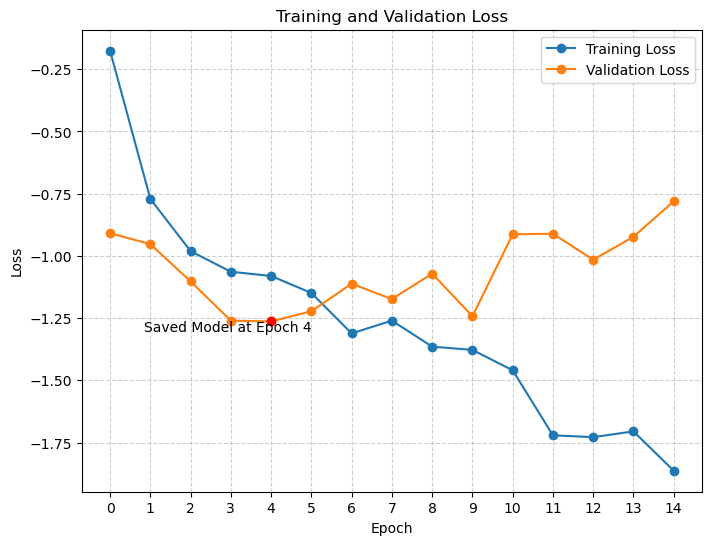

In [5]:
import numpy as np
epochs = np.arange(len(train_loss))
lowest_val_idx = np.argmin(val_loss)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')

# Annotate the lowest validation loss
plt.scatter(lowest_val_idx, val_loss[lowest_val_idx], color='red', zorder=3)
plt.text(lowest_val_idx + 1, val_loss[lowest_val_idx] - 0.05, 
         f'Saved Model at Epoch {lowest_val_idx}', 
         fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.xticks(epochs)  # Set x-axis ticks explicitly as factors (0, 1, 2, ...)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

When you collect the "training loss" during each epoch, you're effectively averaging the loss across all mini‐batches, including the very first batches of that epoch when the model parameters are still relatively unoptimized (or only partially updated). By the time you finish the epoch, the model has been updated multiple times, so when you switch to evaluation mode (model.eval()) and compute the "validation loss," that loss is based on the final state of the model at the end of the epoch—i.e., a model that's already received a full epoch's worth of updates.

Hence, it's not unusual to see:

- Training Loss (Epoch Average): Higher (especially early batches) because it includes loss from the very start of the epoch.
- Validation Loss (After Epoch): Potentially lower because it uses the (better) model at the end of the epoch's training.

# Final model for tangles

In [6]:
# Generate sequences for train and test sets
feature_columns = scaled_train.drop(columns=['projid', 'study', 'fu_year', 'cogdx', 
                                             'amyloid', 'gpath', 'tangles', 'niareagansc']).columns.tolist()
target_columns = ['tangles']

train_ids = scaled_train.projid.unique()
train_sequences = utils.create_sequences(scaled_train, train_ids, feature_columns, target_columns)

test_ids = scaled_test.projid.unique()
test_sequences = utils.create_sequences(scaled_test, test_ids, feature_columns, target_columns)

test_r2, train_loss, val_loss, lr_history = utils.train_and_evaluate_model(
    train_data=train_sequences,
    test_data=test_sequences,
    input_dim=len(feature_columns),
    output_dim=len(target_columns),  
    num_epochs=500,
    patience=10,
    lr_scheduler_patience=5,
    lr_factor=0.5,
    hidden_size=16,
    num_layers=1,
    batch_size=32,
    learning_rate=0.01,
    seed=1217,
    model_save_path="best_model_tangles.pth",
    dropout_rate=0
)

In [7]:
test_r2

[0.40201602953608156]

- Using the best parameter for tangles, the LSTM test $R^2$ for tangles is 0.402
- The elastic-net test $R^2$ for tangles is 0.385

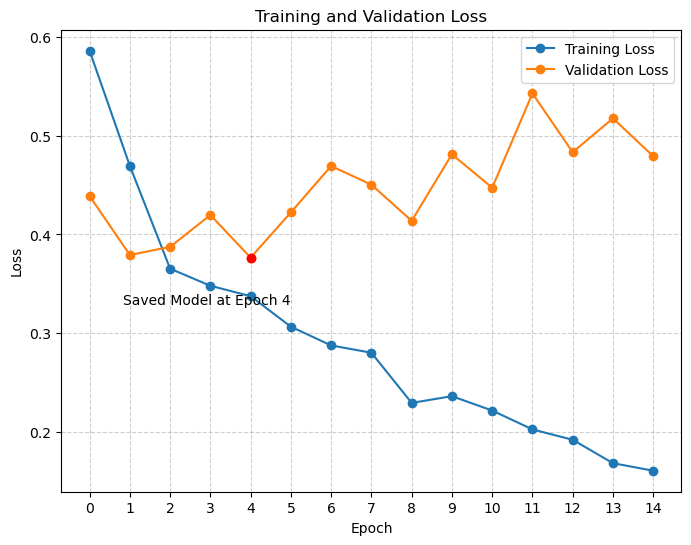

In [9]:
import numpy as np
epochs = np.arange(len(train_loss))
lowest_val_idx = np.argmin(val_loss)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')

# Annotate the lowest validation loss
plt.scatter(lowest_val_idx, val_loss[lowest_val_idx], color='red', zorder=3)
plt.text(lowest_val_idx + 1, val_loss[lowest_val_idx] - 0.05, 
         f'Saved Model at Epoch {lowest_val_idx}', 
         fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.xticks(epochs)  # Set x-axis ticks explicitly as factors (0, 1, 2, ...)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()